In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,r2_score
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
from sklearn.metrics import mean_squared_log_error

In [2]:
df = pd.read_csv('./data/Train.csv')
df.drop(['ID'],1,inplace=True)
df.head()


,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
0,saving,F,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,12.0,1.0,1.0,3.0,248145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73179.474208,637691.332686,0.0,2.0,471134.273813,436171.358054,733348.558128,2.0,1.0,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,NaN,1946.0
1,current,M,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,31.0,7.0,5.0,11.0,24005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405375.599701,182564.042106,20.0,4.0,424970.394837,629510.469240,140978.447774,2.0,17.0,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,NaN,66784.0
2,current,M,34,541.0,NaN,16616.791206,8165.060330,19.0,8.0,23.0,NaN,9.0,8.0,55953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422194.833963,435950.005843,28.0,3.0,120890.570583,616448.408016,370850.536002,4.0,22.0,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,Y,14469.0
3,current,M,39,523.0,15962.461007,17848.552395,28502.691521,NaN,1.0,17.0,3.0,5.0,16.0,406984.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,33573.884833,540109.584943,43.0,5.0,435724.515259,280011.283977,260148.096858,6.0,39.0,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,NaN,6494.0
4,current,M,28,239.0,NaN,35661.995527,13474.223363,23.0,14.0,32.0,NaN,5.0,14.0,34545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161189.083681,306331.265550,5.0,5.0,279918.414129,206119.371916,395626.125055,4.0,15.0,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,NaN,14588.0


In [3]:
df.shape

(15000, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 39 columns):
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null float64
dc_cons_apr              6387 non-null float64
dc_cons_may              7153 non-null float64
dc_cons_jun              5334 non-null float64
cc_count_apr             13915 non-null float64
cc_count_may             14470 non-null float64
cc_count_jun             14256 non-null float64
dc_count_apr             6387 non-null float64
dc_count_may             7153 non-null float64
dc_count_jun             7890 non-null float64
card_lim                 14991 non-null float64
personal_loan_active     1259 non-null float64
vehicle_loan_active      389 non-null float64
personal_loan_closed     1253 non-null float64
vehicle_loan_closed      711 non-null float64
investment_1             643 non-null float

In [5]:
df.describe()

,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons
count,15000.000000,15000.000000,6387.000000,7153.000000,5334.000000,13915.000000,14470.000000,14256.000000,6387.000000,7153.000000,7890.000000,14991.000000,1259.0,389.0,1253.0,711.0,6.430000e+02,1.096000e+03,6.190000e+02,185.000000,1.435600e+04,1.351500e+04,14249.000000,14224.000000,1.351700e+04,1.400400e+04,1.352200e+04,14115.000000,14115.000000,1.352200e+04,1.405200e+04,1.432900e+04,14343.000000,14342.000000,1.432900e+04,15000.000000
mean,35.821400,556.877333,10923.114017,23528.110831,9118.916767,9.063600,9.493020,19.186518,5.285110,6.405704,8.056401,124171.754119,1.0,1.0,1.0,1.0,2.689873e+06,3.987014e+05,6.381214e+04,5565.765185,4.469314e+05,3.654963e+05,15.153414,3.779317,3.319222e+05,5.754567e+05,5.693594e+05,4.118030,14.028339,3.241828e+05,1.003265e+06,9.867396e+05,5.861954,16.176823,3.260935e+05,12268.175133
std,8.375531,192.645289,11056.411334,16522.533692,9933.749457,8.451949,9.062888,12.310610,6.198838,7.525355,9.349850,127449.917860,0.0,0.0,0.0,0.0,3.880940e+06,5.072855e+05,1.142975e+05,6604.928237,9.766115e+05,5.708651e+05,11.975887,3.544697,5.182443e+05,5.645132e+05,3.807421e+05,4.011986,11.533652,2.226731e+05,6.187201e+05,6.083321e+05,4.857434,13.648530,2.016090e+05,11847.712240
min,22.000000,129.000000,15.615941,21.929843,31.457671,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,4.445144e+03,3.859667e+02,2.729691e+02,-10697.666188,4.681577e+01,1.646675e+02,0.000000,0.000000,5.845715e+01,1.472541e+01,9.306745e+01,0.000000,0.000000,2.650332e+01,6.810641e+01,3.941829e+01,0.000000,0.000000,2.550365e+01,0.000000
25%,30.000000,450.750000,4832.873529,11160.115609,3923.840414,3.000000,3.000000,10.000000,1.000000,2.000000,2.000000,45045.500000,1.0,1.0,1.0,1.0,1.160013e+06,1.800505e+05,2.607935e+04,1197.591431,1.706591e+05,1.631317e+05,6.000000,2.000000,1.498775e+05,2.872161e+05,2.848119e+05,2.000000,6.000000,1.592213e+05,4.986986e+05,4.943571e+05,3.000000,6.000000,1.607323e+05,5435.000000
50%,34.000000,566.000000,9704.319537,22829.797859,7930.919138,7.000000,7.000000,18.000000,3.000000,4.000000,5.000000,85488.000000,1.0,1.0,1.0,1.0,2.223758e+06,3.520977e+05,4.625099e+04,5162.030242,3.457515e+05,3.279681e+05,13.000000,3.000000,3.012812e+05,5.649060e+05,5.652102e+05,3.000000,11.000000,3.219137e+05,1.004250e+06,9.741022e+05,5.000000,13.000000,3.233262e+05,10810.000000
75%,39.000000,710.000000,14710.421644,34492.057737,12004.033689,12.000000,13.000000,27.000000,7.000000,8.000000,11.000000,148343.500000,1.0,1.0,1.0,1.0,3.287305e+06,5.455265e+05,6.973028e+04,8394.054277,5.204513e+05,4.940797e+05,21.000000,5.000000,4.564765e+05,8.374087e+05,8.489730e+05,5.000000,19.000000,4.821599e+05,1.493722e+06,1.476865e+06,7.000000,22.000000,4.861349e+05,16394.000000
max,223.000000,977.000000,361712.821531,343536.313152,292828.344121,100.000000,130.000000,137.000000,62.000000,71.000000,98.000000,960458.000000,1.0,1.0,1.0,1.0,4.726321e+07,1.321926e+07,1.480566e+06,35322.422054,1.348554e+07,1.304319e+07,141.000000,78.000000,1.198735e+07,2.177814e+07,2.137043e+07,71.000000,171.000000,1.276041e+07,2.737828e+07,2.589564e+07,94.000000,162.000000,3.147874e+06,237021.000000


In [6]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()

numeric_columns = numeric_features(df)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)

# Function to check the datatypes of all the columns:
def check_datatypes(dataset):
    return dataset.dtypes


check_datatypes(df)

Numeric Features:
   age  region_code   dc_cons_apr   dc_cons_may   dc_cons_jun  cc_count_apr  \
0   36        336.0  10740.542453  26271.575951  12332.393444           4.0   
1   24        529.0  15400.274698  16346.513708  13308.843760          14.0   
2   34        541.0           NaN  16616.791206   8165.060330          19.0   
3   39        523.0  15962.461007  17848.552395  28502.691521           NaN   
4   28        239.0           NaN  35661.995527  13474.223363          23.0   

   cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  \
0           6.0          12.0           1.0           1.0           3.0   
1          10.0          31.0           7.0           5.0          11.0   
2           8.0          23.0           NaN           9.0           8.0   
3           1.0          17.0           3.0           5.0          16.0   
4          14.0          32.0           NaN           5.0          14.0   

   card_lim  personal_loan_active  vehicle_loan_active  

account_type              object
gender                    object
age                        int64
region_code              float64
dc_cons_apr              float64
dc_cons_may              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may             float64
cc_count_jun             float64
dc_count_apr             float64
dc_count_may             float64
dc_count_jun             float64
card_lim                 float64
personal_loan_active     float64
vehicle_loan_active      float64
personal_loan_closed     float64
vehicle_loan_closed      float64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr         float64
max_credit_amount_apr    float64
debit_amount_may         float64
credit_amount_may        float64
credit_count_may         float64
debit_coun

In [7]:
df.isnull().sum()

account_type                 0
gender                       0
age                          0
region_code                  0
dc_cons_apr               8613
dc_cons_may               7847
dc_cons_jun               9666
cc_count_apr              1085
cc_count_may               530
cc_count_jun               744
dc_count_apr              8613
dc_count_may              7847
dc_count_jun              7110
card_lim                     9
personal_loan_active     13741
vehicle_loan_active      14611
personal_loan_closed     13747
vehicle_loan_closed      14289
investment_1             14357
investment_2             13904
investment_3             14381
investment_4             14815
debit_amount_apr           644
credit_amount_apr         1485
debit_count_apr            751
credit_count_apr           776
max_credit_amount_apr     1483
debit_amount_may           996
credit_amount_may         1478
credit_count_may           885
debit_count_may            885
max_credit_amount_may     1478
debit_am

In [8]:
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(df)
print(missing_data)

                       Total    Percent
investment_4           14815  98.766667
loan_enq               14734  98.226667
vehicle_loan_active    14611  97.406667
investment_3           14381  95.873333
investment_1           14357  95.713333
vehicle_loan_closed    14289  95.260000
investment_2           13904  92.693333
personal_loan_closed   13747  91.646667
personal_loan_active   13741  91.606667
dc_cons_jun             9666  64.440000
dc_count_apr            8613  57.420000
dc_cons_apr             8613  57.420000
dc_count_may            7847  52.313333
dc_cons_may             7847  52.313333
dc_count_jun            7110  47.400000
credit_amount_apr       1485   9.900000
max_credit_amount_apr   1483   9.886667
credit_amount_may       1478   9.853333
max_credit_amount_may   1478   9.853333
cc_count_apr            1085   7.233333
debit_amount_may         996   6.640000
debit_amount_jun         948   6.320000
debit_count_may          885   5.900000
credit_count_may         885   5.900000


In [9]:
test_result = pd.read_csv('./data/Test.csv')
test_final = test_result.drop(['ID'],1)
test_final.head()

,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq
0,saving,F,30,528.0,NaN,42771.755048,NaN,7.0,13.0,25.0,NaN,3.0,9.0,45553.0,NaN,NaN,NaN,NaN,NaN,222364.513432,NaN,NaN,463739.683047,213570.034897,19.0,5.0,414855.130729,536192.664464,1.091052e+06,1.0,7.0,341772.344851,6.636797e+05,7.566017e+03,4.0,13.0,398008.239676,NaN
1,saving,M,39,762.0,22502.476453,10236.114508,405.292748,4.0,2.0,31.0,8.0,8.0,18.0,191137.0,NaN,NaN,NaN,NaN,NaN,434630.699792,NaN,NaN,448622.399166,450550.848920,23.0,2.0,589557.278448,148220.153433,3.271761e+05,6.0,13.0,173291.914429,1.722120e+06,1.855703e+06,2.0,18.0,299411.136857,NaN
2,current,M,40,670.0,5641.673462,21121.266438,10685.178733,12.0,9.0,3.0,6.0,5.0,8.0,82114.0,NaN,NaN,NaN,NaN,NaN,111071.003382,NaN,NaN,182112.736659,254344.887804,23.0,5.0,91845.314970,479041.867291,4.125111e+05,4.0,21.0,566091.118578,2.911543e+05,2.689932e+05,10.0,18.0,122919.566871,NaN
3,current,F,24,548.0,NaN,6744.070501,NaN,9.0,2.0,2.0,NaN,1.0,NaN,74866.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549095.984242,385614.872092,15.0,1.0,234808.062527,459470.252371,2.730897e+05,7.0,19.0,397413.923723,6.850615e+05,9.234176e+05,9.0,12.0,549513.485678,NaN
4,current,M,33,515.0,17672.792182,77621.691080,7066.852574,1.0,1.0,26.0,10.0,13.0,13.0,73548.0,NaN,NaN,NaN,NaN,1.371296e+06,NaN,NaN,NaN,188671.004952,146363.893024,22.0,1.0,370699.272099,263422.644148,7.932167e+05,9.0,38.0,179406.943083,5.525640e+05,6.732497e+05,15.0,34.0,198565.622807,NaN


In [10]:
test_final.isnull().sum()

account_type                0
gender                      0
age                         0
region_code                 0
dc_cons_apr              2903
dc_cons_may              2667
dc_cons_jun              3248
cc_count_apr              361
cc_count_may              180
cc_count_jun              259
dc_count_apr             2903
dc_count_may             2667
dc_count_jun             2378
card_lim                    3
personal_loan_active     4607
vehicle_loan_active      4867
personal_loan_closed     4587
vehicle_loan_closed      4754
investment_1             4806
investment_2             4673
investment_3             4808
investment_4             4936
debit_amount_apr          235
credit_amount_apr         516
debit_count_apr           255
credit_count_apr          255
max_credit_amount_apr     517
debit_amount_may          339
credit_amount_may         495
credit_count_may          313
debit_count_may           313
max_credit_amount_may     495
debit_amount_jun          330
credit_amo

In [11]:
drop_columns = ['investment_1', 'investment_2', 'investment_3' ,'investment_4','vehicle_loan_active', 'vehicle_loan_closed',
                'personal_loan_closed', 'personal_loan_active', 'loan_enq']
df.drop(columns = drop_columns,axis=1, inplace=True)
df.head()
test_final.drop(columns = drop_columns,axis=1, inplace=True)
test_final.head()

,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun
0,saving,F,30,528.0,NaN,42771.755048,NaN,7.0,13.0,25.0,NaN,3.0,9.0,45553.0,463739.683047,213570.034897,19.0,5.0,414855.130729,536192.664464,1.091052e+06,1.0,7.0,341772.344851,6.636797e+05,7.566017e+03,4.0,13.0,398008.239676
1,saving,M,39,762.0,22502.476453,10236.114508,405.292748,4.0,2.0,31.0,8.0,8.0,18.0,191137.0,448622.399166,450550.848920,23.0,2.0,589557.278448,148220.153433,3.271761e+05,6.0,13.0,173291.914429,1.722120e+06,1.855703e+06,2.0,18.0,299411.136857
2,current,M,40,670.0,5641.673462,21121.266438,10685.178733,12.0,9.0,3.0,6.0,5.0,8.0,82114.0,182112.736659,254344.887804,23.0,5.0,91845.314970,479041.867291,4.125111e+05,4.0,21.0,566091.118578,2.911543e+05,2.689932e+05,10.0,18.0,122919.566871
3,current,F,24,548.0,NaN,6744.070501,NaN,9.0,2.0,2.0,NaN,1.0,NaN,74866.0,549095.984242,385614.872092,15.0,1.0,234808.062527,459470.252371,2.730897e+05,7.0,19.0,397413.923723,6.850615e+05,9.234176e+05,9.0,12.0,549513.485678
4,current,M,33,515.0,17672.792182,77621.691080,7066.852574,1.0,1.0,26.0,10.0,13.0,13.0,73548.0,188671.004952,146363.893024,22.0,1.0,370699.272099,263422.644148,7.932167e+05,9.0,38.0,179406.943083,5.525640e+05,6.732497e+05,15.0,34.0,198565.622807


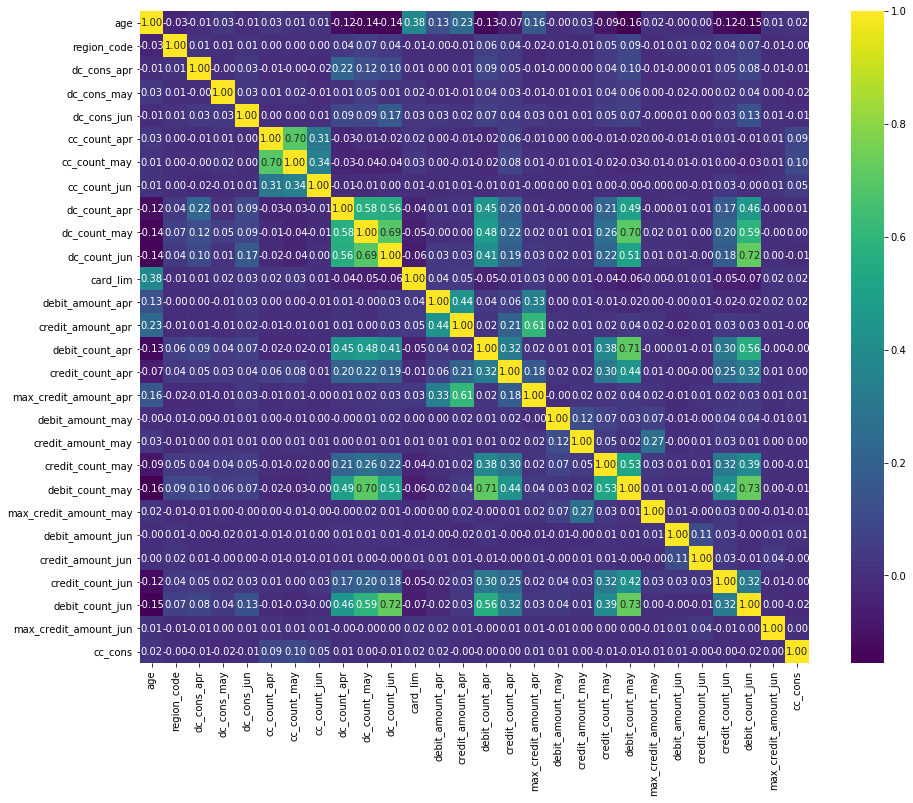

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.2f')

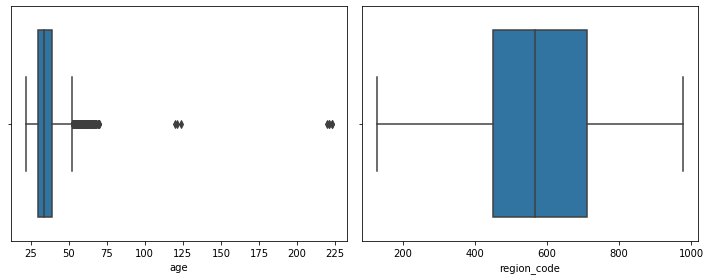

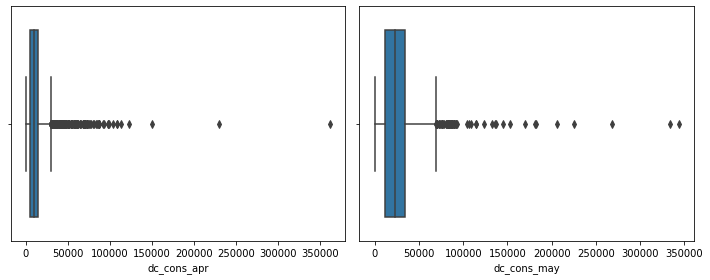

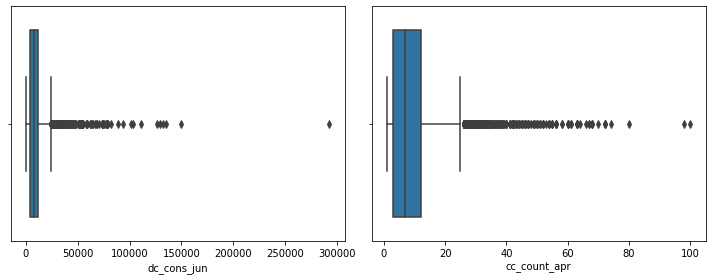

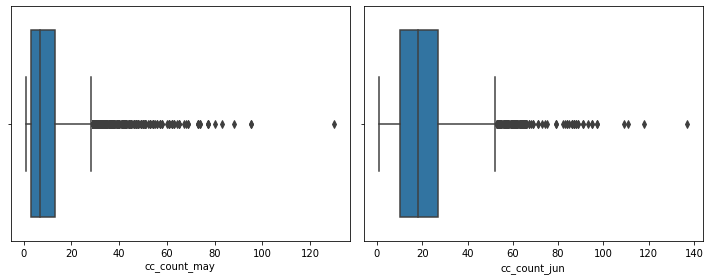

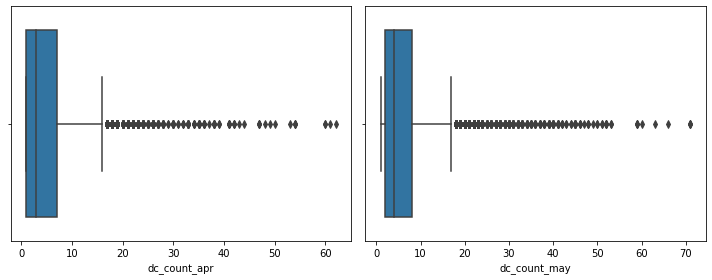

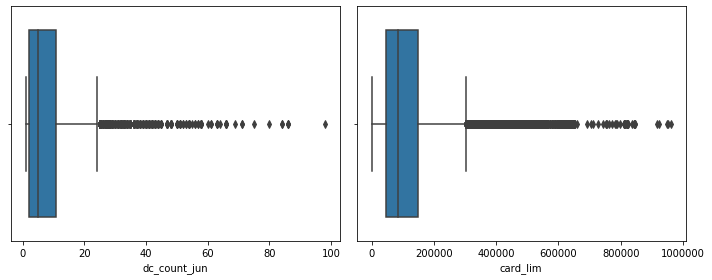

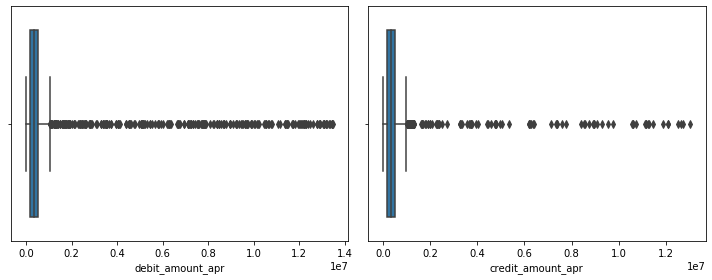

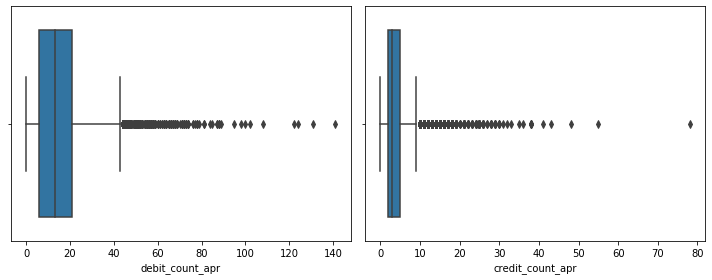

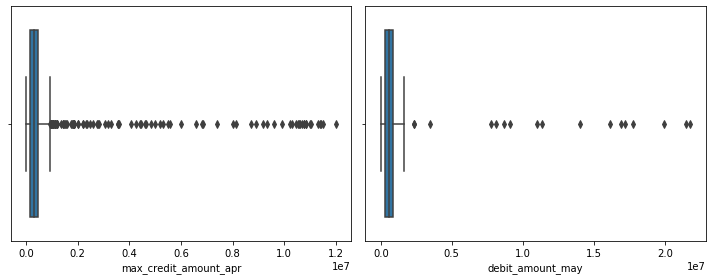

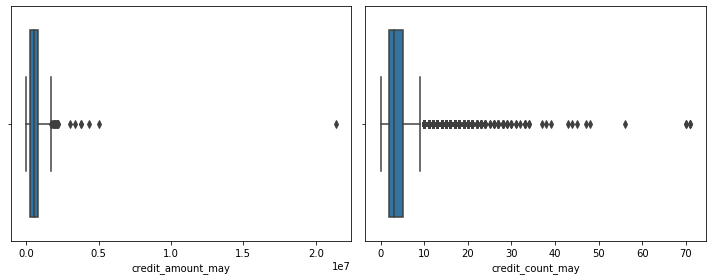

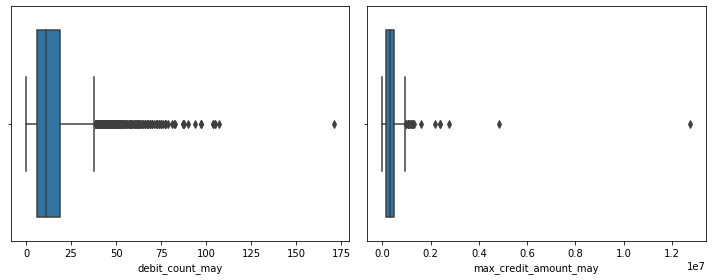

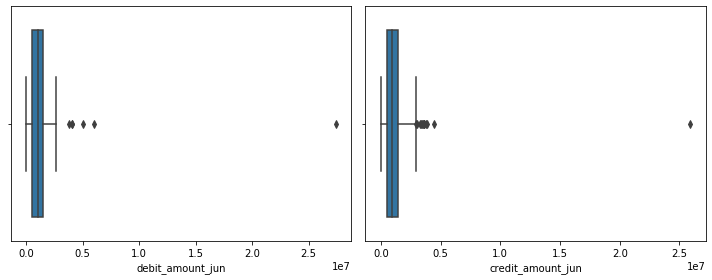

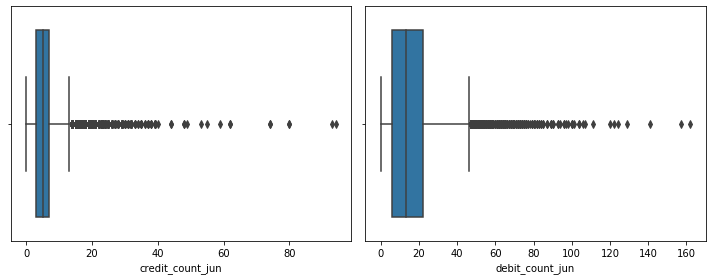

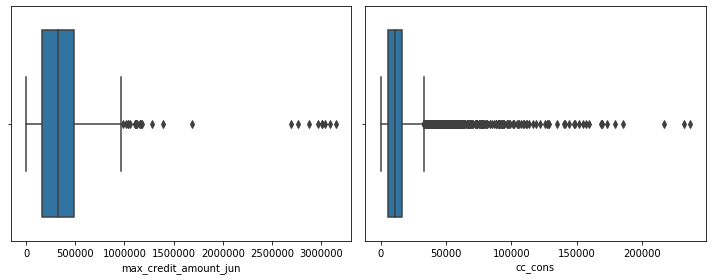

In [13]:
# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_box_plots(df)

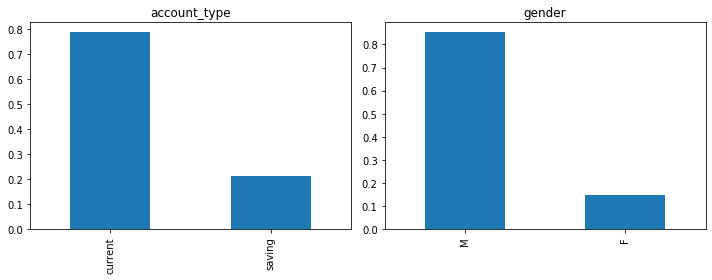

In [14]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                  
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
        
 
plot = plot_categorical_columns(df)

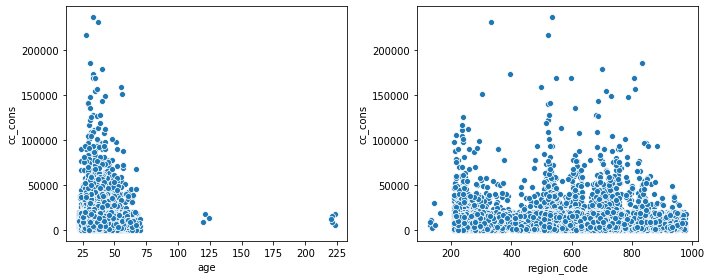

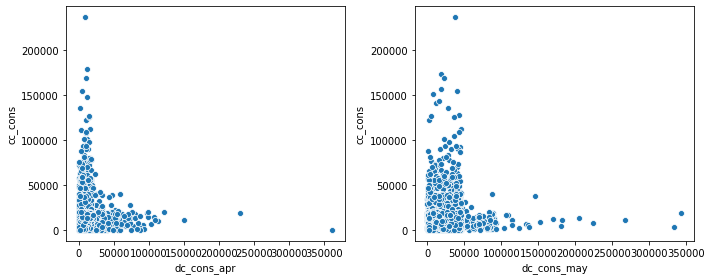

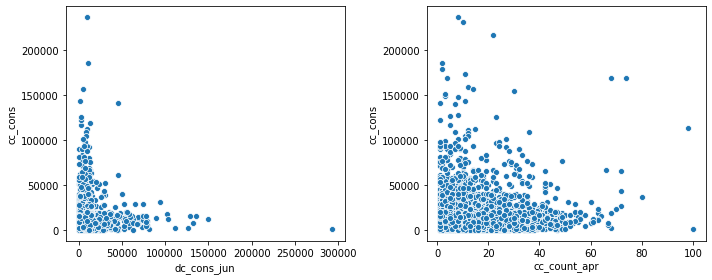

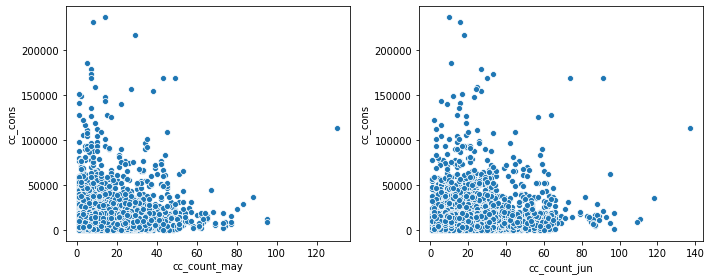

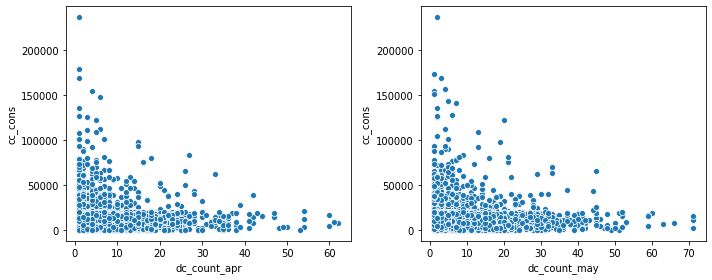

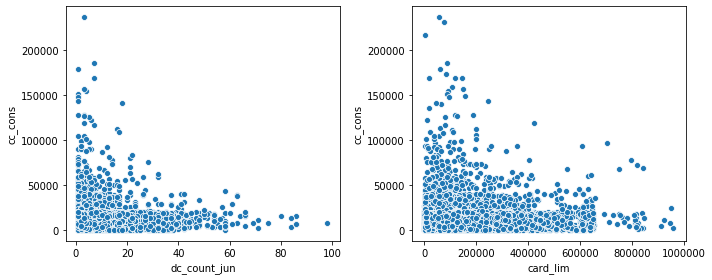

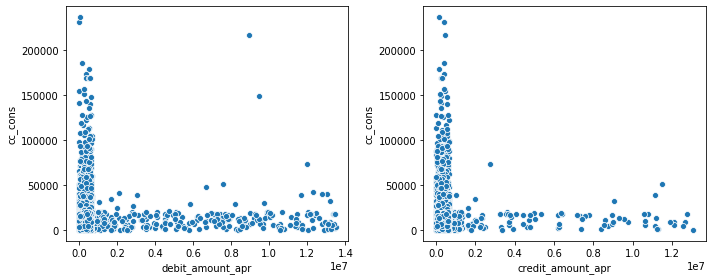

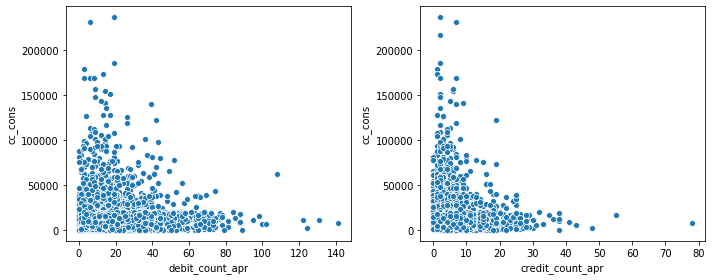

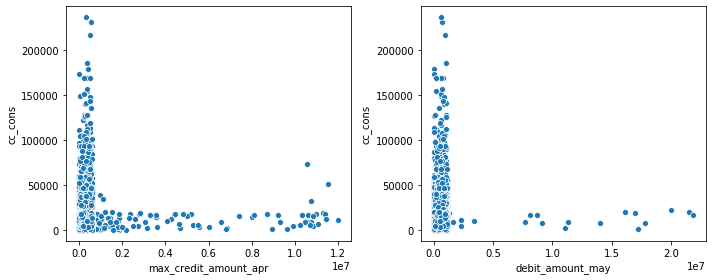

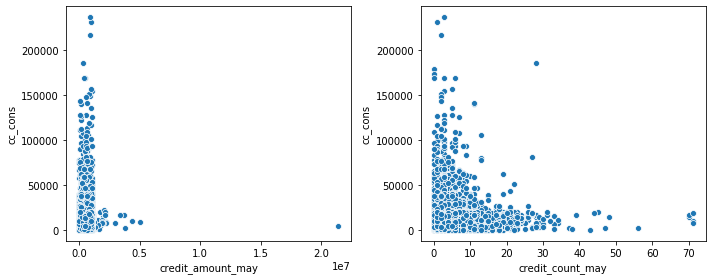

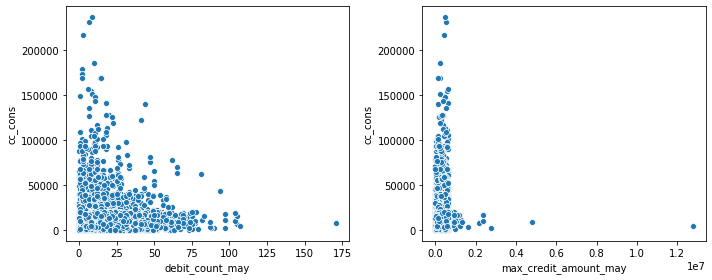

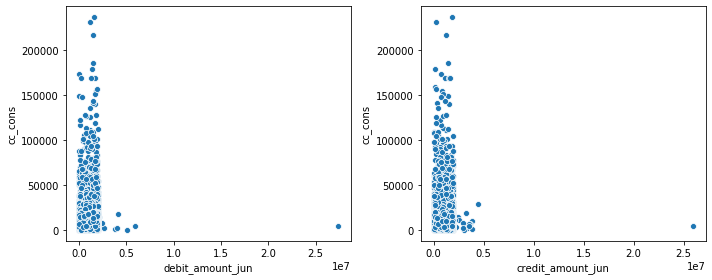

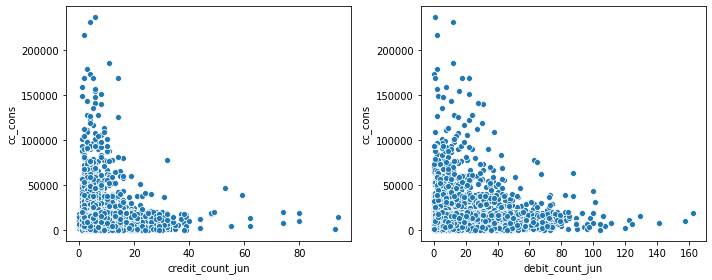

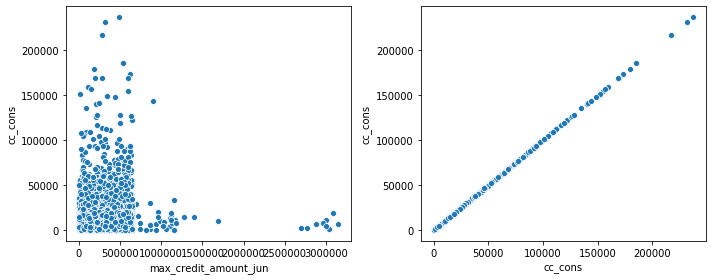

In [15]:
def scatterplot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.scatterplot(dataframe[numeric_columns[i]], dataframe['cc_cons'])
            plt.subplot(122)            
            sns.scatterplot(dataframe[numeric_columns[i+1]], dataframe['cc_cons'])
            plt.tight_layout()
            plt.show()

        else:
            sns.scatterplot(dataframe[numeric_columns[i]], dataframe['cc_cons'])
            
            
scatterplot_continuous_columns(df)

In [16]:
account = pd.get_dummies(df['account_type'], prefix='acc')
account.head()
acc =  pd.get_dummies(test_final['account_type'], prefix='acc')
acc.head()

,acc_current,acc_saving
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [17]:
gender = pd.get_dummies(df['gender'], prefix='gndr')
gender.head()
gndr=pd.get_dummies(test_final['gender'], prefix='gndr')
gndr.head()

,gndr_F,gndr_M
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [18]:
df= pd.concat([df, gender], axis=1)
df= pd.concat([df, account], axis=1)
df.drop(['account_type'],1,inplace=True)
df.drop(['gender'],1,inplace=True)
df.head()


,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons,gndr_F,gndr_M,acc_current,acc_saving
0,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,12.0,1.0,1.0,3.0,248145.0,73179.474208,637691.332686,0.0,2.0,471134.273813,436171.358054,733348.558128,2.0,1.0,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,1946.0,1,0,0,1
1,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,31.0,7.0,5.0,11.0,24005.0,405375.599701,182564.042106,20.0,4.0,424970.394837,629510.469240,140978.447774,2.0,17.0,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,66784.0,0,1,1,0
2,34,541.0,NaN,16616.791206,8165.060330,19.0,8.0,23.0,NaN,9.0,8.0,55953.0,422194.833963,435950.005843,28.0,3.0,120890.570583,616448.408016,370850.536002,4.0,22.0,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,14469.0,0,1,1,0
3,39,523.0,15962.461007,17848.552395,28502.691521,NaN,1.0,17.0,3.0,5.0,16.0,406984.0,33573.884833,540109.584943,43.0,5.0,435724.515259,280011.283977,260148.096858,6.0,39.0,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,6494.0,0,1,1,0
4,28,239.0,NaN,35661.995527,13474.223363,23.0,14.0,32.0,NaN,5.0,14.0,34545.0,161189.083681,306331.265550,5.0,5.0,279918.414129,206119.371916,395626.125055,4.0,15.0,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,14588.0,0,1,1,0


In [19]:
test_final= pd.concat([test_final, gndr], axis=1)
test_final= pd.concat([test_final, acc], axis=1)
test_final.drop(['account_type'],1,inplace=True)
test_final.drop(['gender'],1,inplace=True)
test_final.head()

,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,gndr_F,gndr_M,acc_current,acc_saving
0,30,528.0,NaN,42771.755048,NaN,7.0,13.0,25.0,NaN,3.0,9.0,45553.0,463739.683047,213570.034897,19.0,5.0,414855.130729,536192.664464,1.091052e+06,1.0,7.0,341772.344851,6.636797e+05,7.566017e+03,4.0,13.0,398008.239676,1,0,0,1
1,39,762.0,22502.476453,10236.114508,405.292748,4.0,2.0,31.0,8.0,8.0,18.0,191137.0,448622.399166,450550.848920,23.0,2.0,589557.278448,148220.153433,3.271761e+05,6.0,13.0,173291.914429,1.722120e+06,1.855703e+06,2.0,18.0,299411.136857,0,1,0,1
2,40,670.0,5641.673462,21121.266438,10685.178733,12.0,9.0,3.0,6.0,5.0,8.0,82114.0,182112.736659,254344.887804,23.0,5.0,91845.314970,479041.867291,4.125111e+05,4.0,21.0,566091.118578,2.911543e+05,2.689932e+05,10.0,18.0,122919.566871,0,1,1,0
3,24,548.0,NaN,6744.070501,NaN,9.0,2.0,2.0,NaN,1.0,NaN,74866.0,549095.984242,385614.872092,15.0,1.0,234808.062527,459470.252371,2.730897e+05,7.0,19.0,397413.923723,6.850615e+05,9.234176e+05,9.0,12.0,549513.485678,1,0,1,0
4,33,515.0,17672.792182,77621.691080,7066.852574,1.0,1.0,26.0,10.0,13.0,13.0,73548.0,188671.004952,146363.893024,22.0,1.0,370699.272099,263422.644148,7.932167e+05,9.0,38.0,179406.943083,5.525640e+05,6.732497e+05,15.0,34.0,198565.622807,0,1,1,0


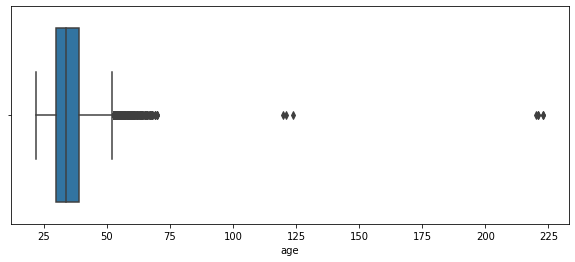

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(df['age'])

In [21]:
median = df.loc[df['age']<75, 'age'].median()
df.loc[df.age > 75, 'age'] = np.nan
df['age'].fillna(median,inplace=True)

In [22]:
median = test_final.loc[test_final['age']<75, 'age'].median()
test_final.loc[test_final.age > 75, 'age'] = np.nan
test_final['age'].fillna(median,inplace=True)

In [23]:
# #set up bins
bin = [0,31,41,51,61,75]
# #use pd.cut function can attribute the values into its specific bins
df['age_bin'] = pd.cut(x=df.age,bins=bin,labels=[1,2,3,4,5])
df.drop(['age'],1,inplace=True)
age = pd.get_dummies(df['age_bin'],prefix='age')
age.head()

,age_1,age_2,age_3,age_4,age_5
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [24]:
# #set up bins
bin = [0,31,41,51,61,75]
# #use pd.cut function can attribute the values into its specific bins
test_final['age_bin'] = pd.cut(x=test_final.age,bins=bin,labels=[1,2,3,4,5])
test_final.drop(['age'],1,inplace=True)
age1 = pd.get_dummies(test_final['age_bin'],prefix='age')
age1.head()

,age_1,age_2,age_3,age_4,age_5
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [25]:
df = pd.concat([df, age], axis=1)
df.drop('age_bin',1, inplace=True)


In [26]:
test_final = pd.concat([test_final, age1], axis=1)
test_final.drop('age_bin',1, inplace=True)


In [27]:
X = df.drop('cc_cons',1)
y = df['cc_cons']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
def fill_null_values(dataset, value):
    nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False))
    nulls = nulls[nulls>0]
    nulls.columns = ['Null Count']
    nulls.index.name = 'Feature'
    

    for column in nulls[nulls["Null Count"]> 0].index:
        if dataset[column].dtype == np.number and value == 0:
            dataset[column].fillna(dataset[column].mean(), inplace = True)
        elif value == 1:
            dataset[column].fillna(dataset[column].median(), inplace = True)
        else:
            dataset[column].fillna("NA", inplace = True)
    print(dataset.isnull().sum())
    return dataset

X_train=fill_null_values(X_train,1)
X_test=fill_null_values(X_test,1)
test_final=fill_null_values(test_final,1)

region_code              0
dc_cons_apr              0
dc_cons_may              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
gndr_F                   0
gndr_M                   0
acc_current              0
acc_saving               0
age_1                    0
age_2                    0
age_3                    0
age_4                    0
age_5                    0
dtype: int64
region_code              0
dc_cons_apr    

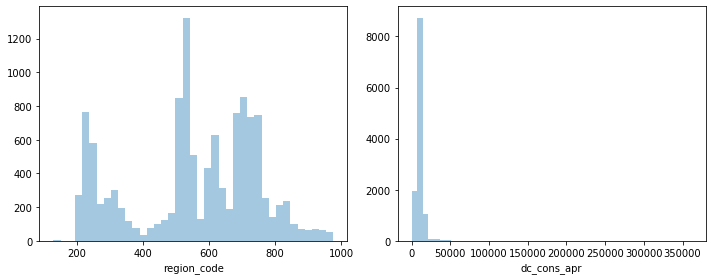

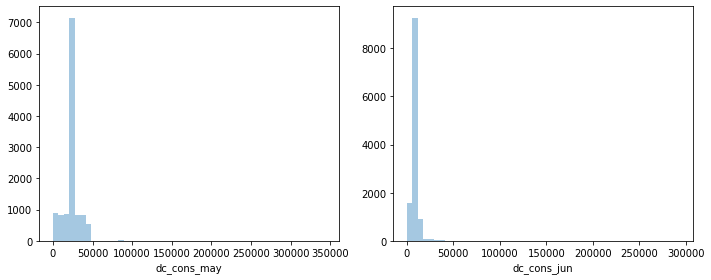

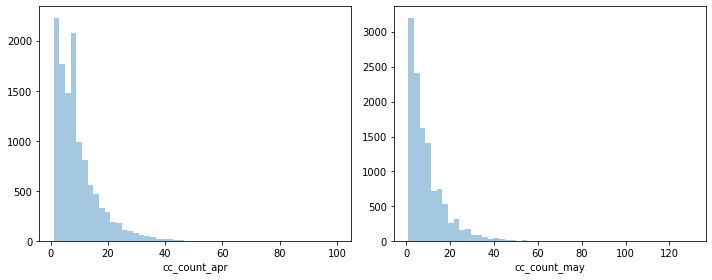

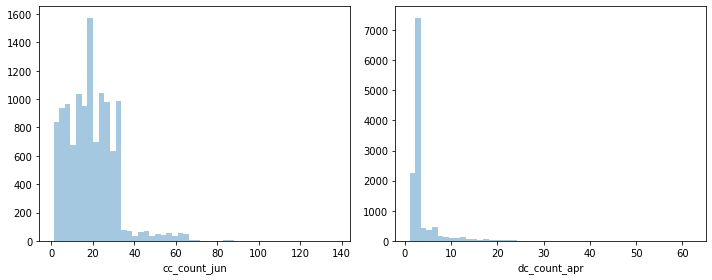

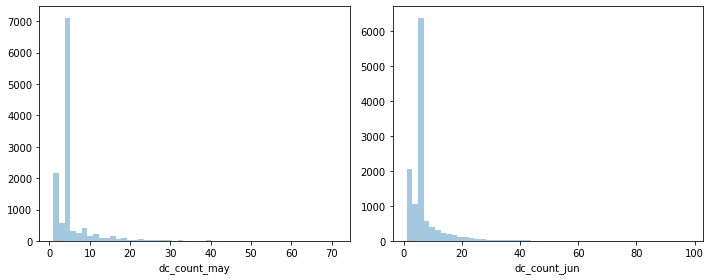

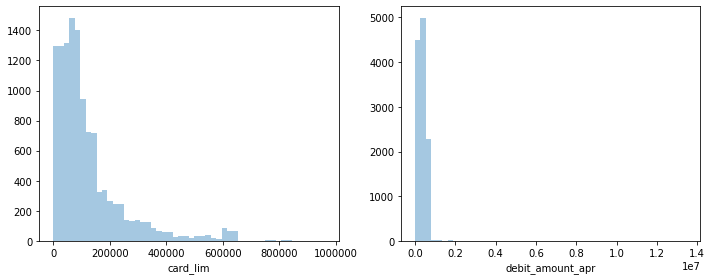

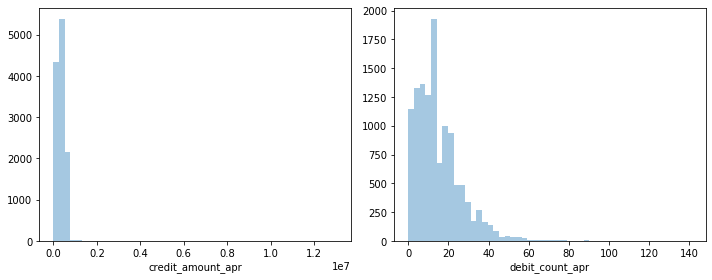

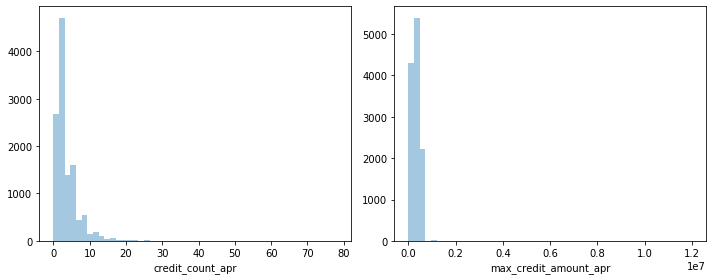

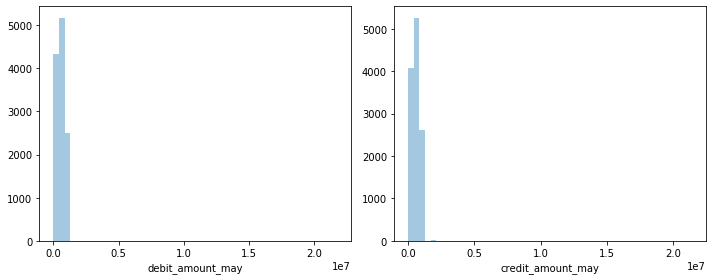

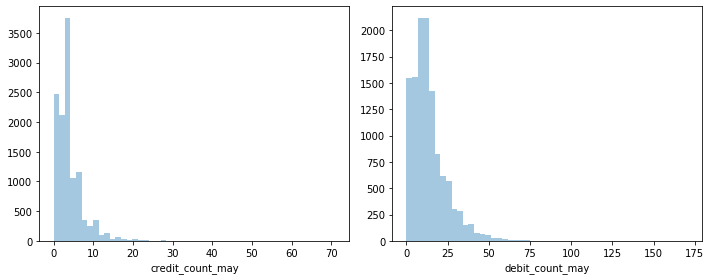

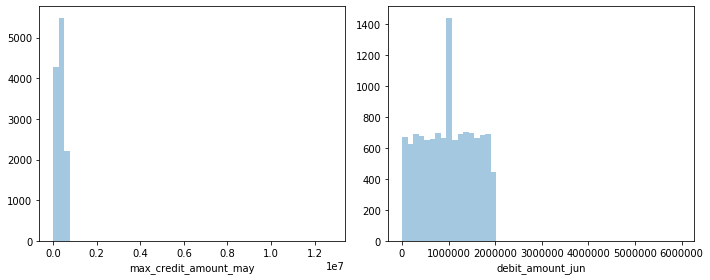

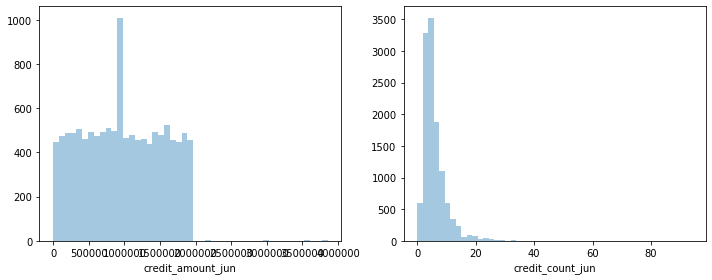

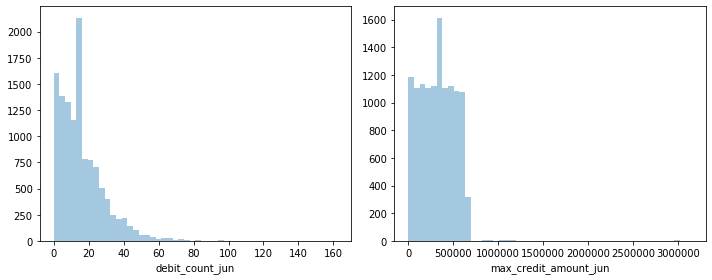

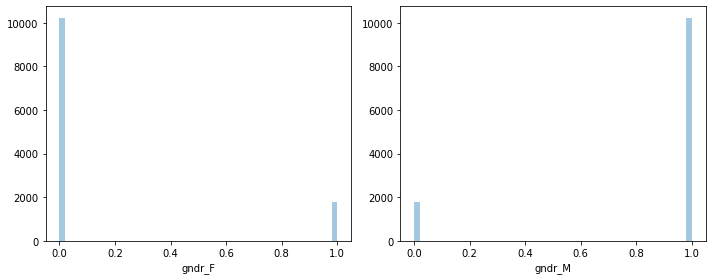

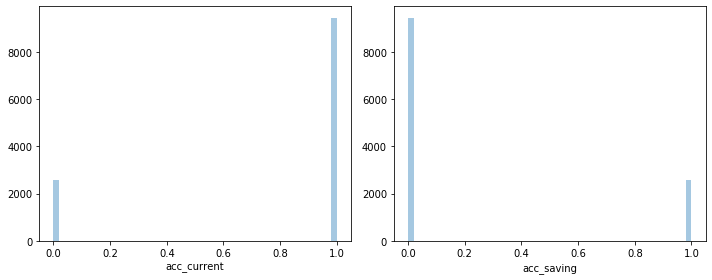

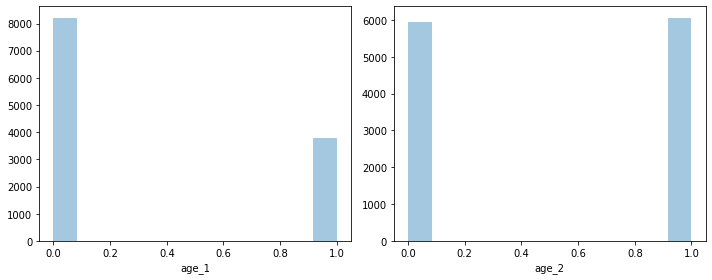

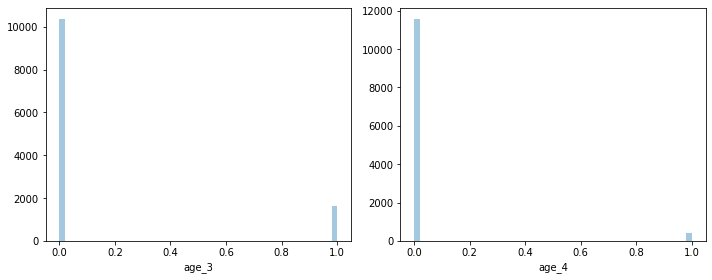

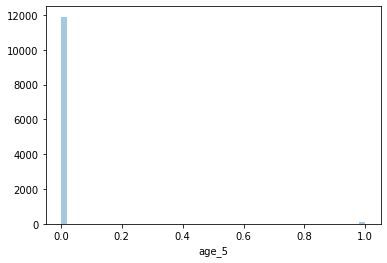

In [29]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            
            
plot_continuous_columns(X_train)

In [30]:
num_columns = ['dc_cons_apr','dc_cons_may','dc_cons_jun','cc_count_apr','cc_count_may','cc_count_jun','dc_count_apr',
               'dc_count_may','dc_count_jun','card_lim','debit_amount_apr','credit_amount_apr','debit_count_apr','credit_count_apr',
               'max_credit_amount_apr','debit_amount_may','credit_amount_may','debit_count_may','credit_count_may',
               'max_credit_amount_may','debit_amount_jun','credit_amount_jun','debit_count_jun','credit_count_jun',
               'max_credit_amount_jun']

normalizer = MinMaxScaler()
#normalizer.fit(X_train[num_columns])
X_train[num_columns] = normalizer.fit_transform(X_train[num_columns])
X_test[num_columns] = normalizer.fit_transform(X_test[num_columns])
test_final[num_columns] = normalizer.fit_transform(test_final[num_columns])
print(X_train.head())
print(X_test.head())

       region_code  dc_cons_apr  dc_cons_may  dc_cons_jun  cc_count_apr  \
13136        684.0     0.026770     0.065778     0.027093      0.020202   
3536         621.0     0.037358     0.049995     0.027093      0.010101   
10296        861.0     0.026770     0.074230     0.027093      0.060606   
2137         682.0     0.026770     0.065778     0.011743      0.222222   
14775        580.0     0.026770     0.130734     0.027093      0.141414   

       cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  \
13136      0.015504      0.014706      0.032787      0.042857      0.041237   
3536       0.093023      0.161765      0.098361      0.057143      0.072165   
10296      0.046512      0.176471      0.032787      0.014286      0.010309   
2137       0.193798      0.058824      0.032787      0.042857      0.144330   
14775      0.038760      0.227941      0.032787      0.142857      0.020619   

       card_lim  debit_amount_apr  credit_amount_apr  debit_count_apr  \
1

In [31]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [32]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred_lin = linreg.predict(X_test)
rmsle_lin =  np.sqrt(mean_squared_log_error(y_test, y_pred_lin))
print("Linear Regression RMSLE : ", rmsle_lin)

Linear Regression RMSLE :  0.12892166329650465


In [33]:
from sklearn.linear_model import Lasso,Ridge

# Code starts here

# instantiate lasso model
lasso = Lasso(random_state=0)

# fit and predict
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)

# calculate RMSE
lasso_rmsle = np.sqrt(mean_squared_log_error(y_test,lasso_pred))
print("Lasso RMSLE : ", lasso_rmsle)

Lasso RMSLE :  0.12797060057983048


In [34]:
# instantiate ridge model
ridge = Ridge(random_state=0)

# fit and predict
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)

# calculate RMSE
ridge_rmsle = np.sqrt(mean_squared_log_error(ridge_pred, y_test))
print("Ridge RMSLE : ",ridge_rmsle)

Ridge RMSLE :  0.12821628568753005


In [35]:
dt2 = DecisionTreeRegressor(max_depth=6, criterion='mse', min_samples_leaf=100,random_state=0)
dt2.fit(X_train,y_train)
y_pred_dt2 = dt2.predict(X_test)

rmsle_2 = np.sqrt(mean_squared_log_error(y_test, y_pred_dt2))
print("Decision Tree RMSLE : ",rmsle_2)

Decision Tree RMSLE :  0.12846511088797388


In [36]:
from sklearn.ensemble import BaggingRegressor

# Code starts here

bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100 , max_samples=100 , random_state=0)

bagging_reg.fit(X_train, y_train)
y_pred_bag = bagging_reg.predict(X_test)
rmsle_bag = np.sqrt(mean_squared_log_error(y_test, y_pred_bag))
print("Bagging Regressor RMSLE : ",rmsle_bag)

Bagging Regressor RMSLE :  0.13417295238959956


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, n_jobs=100, min_samples_leaf=100 ,max_depth=3,random_state=0)
rf.fit(X_train, y_train)
y_pred_rff = rf.predict(X_test)
rmsle_rff = np.sqrt(mean_squared_log_error(y_test, y_pred_rff))
print("Random Forest RMSLE : ",rmsle_rff)

Random Forest RMSLE :  0.1276121100893202


In [53]:
param_grid = {'max_depth': [3, 6, 8],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [ 4,6,8],
 'n_estimators': [100,150]}
regressor = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(regressor,param_grid = param_grid)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
rmsle2= np.sqrt(mean_squared_log_error(pred,y_test)) 
print("Random Forest after GridSearch RMSLE : ",rmsle2)

Random Forest after GridSearch RMSLE :  0.12758087814016364


In [38]:
from sklearn.ensemble import AdaBoostRegressor

dt_reg = DecisionTreeRegressor(max_depth=1, random_state=0)
ada_reg = AdaBoostRegressor(base_estimator=dt_reg, random_state=0)
ada_reg.fit(X_train,y_train)
y_pred_ada = ada_reg.predict(X_test)
rmsle_ada = np.sqrt(mean_squared_log_error(y_test, y_pred_ada))
print("AdaBoost RMSLE : ",rmsle_ada)

AdaBoost RMSLE :  0.1730720958145583


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model_100 = GradientBoostingRegressor(n_estimators=100, max_depth=6, random_state=0)
gb_model_100.fit(X_train, y_train)
y_pred_gb100 = gb_model_100.predict(X_test)
rmsle_gb100 = np.sqrt(mean_squared_log_error(y_test, y_pred_gb100))
print("Gradient Boosting RMSLE : ",rmsle_gb100)

Gradient Boosting RMSLE :  0.1386963476149374


In [40]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(base_estimator=dt_reg, random_state=0)
xgb_reg.fit(X_train,y_train)
y_pred_xgb = xgb_reg.predict(X_test)
rmsle_xgb = np.sqrt(mean_squared_log_error(y_test, y_pred_xgb))
print("XG Boost RMSLE : ", rmsle_xgb)

[12:02:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG Boost RMSLE :  0.12933556221460862


In [41]:
from mlxtend.regressor import StackingRegressor

regressor1 = DecisionTreeRegressor(random_state=0)
regressor2 = DecisionTreeRegressor(random_state=1)
regressor3 = DecisionTreeRegressor(random_state=2)
regressor4 = DecisionTreeRegressor(random_state=3)
regressor_list=[regressor1,regressor2,regressor3,regressor4]

m_regressor=RandomForestRegressor()

# Code starts here

sreg = StackingRegressor(regressors=regressor_list, meta_regressor=m_regressor)
sreg.fit(X_train,y_train)
pred_stk = sreg.predict(X_test)
rmsle_stk= np.sqrt(mean_squared_log_error(pred_stk,y_test)) 
print("XG Boost RMSLE : ", rmsle_stk)

XG Boost RMSLE :  0.19499768122278108


In [46]:
# regularization parameters for grid search
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3]
#ridge_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

# Code starts here

# instantiate lasso and ridge models
lasso_model = Lasso(random_state=0)
ridge_model = Ridge(random_state=0)

# grid search on lasso and ridge
ridge_grid = GridSearchCV(estimator=ridge_model,param_grid=dict(alpha=ridge_lambdas))
ridge_grid.fit(X_train,y_train)

lasso_grid = GridSearchCV(estimator=lasso_model,param_grid=dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train,y_train)

# make predictions 
ridge_pred = ridge_grid.predict(X_test)
ridge_rmsle = np.sqrt(mean_squared_log_error(ridge_pred,y_test))
print("Ridge RMSLE : ", ridge_rmsle)
print(ridge_grid.best_params_)

lasso_pred = lasso_grid.predict(X_test)
lasso_rmsle = np.sqrt(mean_squared_log_error(lasso_pred,y_test)) 
print("Lasso RMSLE : ", lasso_rmsle)
print(lasso_grid.best_params_)

Ridge RMSLE :  0.12780569869757666
{'alpha': 3}
Lasso RMSLE :  0.12788284671103547
{'alpha': 0.001}


In [54]:
# Prediction using Random Forest

prediction = rf.predict(test_final)
final_prediction = pd.Series(np.exp(prediction) - 1)

test_result = pd.DataFrame(test_result['ID'])

submission = pd.concat([test_result,final_prediction],axis=1)

submission.columns=['ID','cc_cons']

submission.to_csv('./data/submission.csv',index=False)